In [1]:
import pandas as pd
import requests
import json
from pprint import pprint
import numpy as np
#import hvplot.pandas
import gmaps
import os
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import pytz
%matplotlib inline

In [2]:
print("Welcome to the Stock Investment Tool!")

Welcome to the Stock Investment Tool!


In [19]:
print("Please choose from the List of stocks you would like to invest in?")
print('1.) Apple - APPL')
print('2.) Amazon - AMZN')
print('3.) Tesla - TSLA')
print('4.) CVS - CVS')
print('5.) S&P 500 - .INX')
print('6.) Boeing  - BA')
print('7.) Salesforce - CRM')
print('8.) Activision Blizzard - ATVI')
print("9.) Lowe's  - LOW")
print('10.) Apple - APPL')


Please choose from the List of stocks you would like to invest in?
1.) Apple - APPL
2.) Amazon - AMZN
3.) Tesla - TSLA
4.) CVS - CVS
5.) S&P 500 - .INX
6.) Boeing  - BA
7.) Salesforce - CRM
8.) Activision Blizzard - ATVI
9.) Lowe's  - LOW
10.) Apple - APPL


In [18]:
pie =2

In [21]:
int(pie*2)

4

Please choose from the List of stocks you would like to invest in?
1.) Apple - AAPL
2.) Amazon - AMZN
3.) Tesla - TSLA
4.) CVS - CVS
5.) S&P 500 - .INX
6.) Boeing  - BA
7.) Salesforce - CRM
8.) Activision Blizzard - ATVI
9.) Lowe's  - LOW


 boeing


Thank you, you have chosen,BA to invest into. 
Would you like to add another stock to your portfolio? 


 y


Please choose from the list above to add another stock! 
Please choose from the List of stocks you would like to invest in?
1.) Apple - AAPL
2.) Amazon - AMZN
3.) Tesla - TSLA
4.) CVS - CVS
5.) S&P 500 - .INX
6.) Boeing  - BA
7.) Salesforce - CRM
8.) Activision Blizzard - ATVI
9.) Lowe's  - LOW


 Salesforce


Thank you, you have chosen,CRM to invest into. 
Would you like to add another stock to your portfolio? 


 n


Good Bye!
------------------------------------------------------------------
How much would you like to invest? Please choose a number for your option
1. Residetial Profit
2. Non-Residential Profit
3. Custom amount


 1


You have chose to invest your residential Profit, which has an amount of $67719.21747062322
Thank you, we our now adding your investment into your portfolio!
------------------------------------------------------------------
How many years will you like to Forecast your returns? 


 2


Okay, thank you we are preparing your portfolio anaylsis with a Forecast of 2 years 
------------------------------------------------------------------
STARTING MONTE CARLO ANALYSIS .....
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Runnin

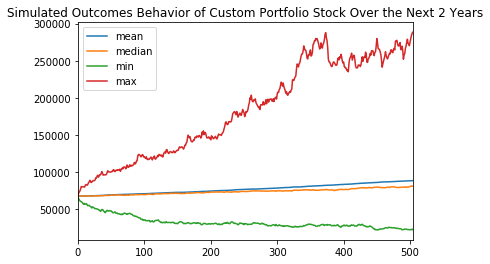

In [25]:
stocks=[]
stuck = False
while (stuck == False):
    
    print("Please choose from the List of stocks you would like to invest in?")
    print('1.) Apple - AAPL')
    print('2.) Amazon - AMZN')
    print('3.) Tesla - TSLA')
    print('4.) CVS - CVS')
    print('5.) S&P 500 - .INX')
    print('6.) Boeing  - BA')
    print('7.) Salesforce - CRM')
    print('8.) Activision Blizzard - ATVI')
    print("9.) Lowe's  - LOW")

    stock =input()
    stock=stock.upper()


    if stock == 'APPLE' or stock == 'AAPL':
        stock='AAPL'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True

    elif stock == 'AMAZON' or stock == 'AMZN':
        stock='AMZN'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True
    elif stock == 'Tesla' or stock == 'TSLA':
        stock='TSLA'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True
    elif stock == 'CVS':
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True
    elif stock == 'S&P 500' or stock == '.INX':
        stock='.INX'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True
    elif stock == 'BOEING' or stock == 'BA':
        stock='BA'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True
    elif stock == 'SALESFORCE' or stock == 'CRM':
        stock='CRM'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True
    elif stock == 'ACTIVISION BLIZZARD' or stock == 'ATVI':
        stock='ATVI'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True
    elif stock == "LOWE'S" or stock == 'LOW':
        stock='LOW'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True
    elif stock == 'Dow Jones' or stock == '.DJI':
        stock='.DJI'
        stocks.append(stock)
        print(f'Thank you, you have chosen,{stock} to invest into. ')
        print('Would you like to add another stock to your portfolio? ')
        choice = input()

        if choice.upper() == 'YES' or choice.upper() == 'Y':
            print('Please choose from the list above to add another stock! ')
            continue
        elif choice.upper() == 'NO' or choice.upper() == 'N':
            print('Good Bye!')
            stuck = True

    else:
        print("Sorry wrong command Please try again")
        
        if len(stocks) == 3:
            print('You had successfully added 3 stocks. Thank you! ')
            stuck=True
        else:
            continue
            
print('------------------------------------------------------------------')
print('How much would you like to invest? Please choose a number for your option')
print('1. Residetial Profit')
print('2. Non-Residential Profit')
print('3. Custom amount')
option = int(input())
if option == 1:
    investment =TOTAL_INITAL_INVESTMENT_RESIDENTIAL
    print(f'You have chose to invest your residential Profit, which has an amount of ${investment}')
    print("Thank you, we our now adding your investment into your portfolio!")
elif option==2:
    investment =TOTAL_INITAL_INVESTMENT_NONRESIDENTIAL
    print(f'You have chose to invest your non-residential Profit, which has an amount of ${investment}')
    print("Thank you, we our now adding your investment into your portfolio!")
elif option==3:
    investment= int(input("Please enter the amount you will like to invest? "))
    print(f'You have chose an amount of ${investment}')
    print("Thank you, we our now adding your investment into your portfolio!")
else:
    investment= int(input("Please enter the amount you will like to invest? "))
    print(f'You have chose an amount of ${investment}')
    print("Thank you, we our now adding your investment into your portfolio!")

    



print('------------------------------------------------------------------')
print('How many years will you like to Forecast your returns? ')
years = int(input())
print(f'Okay, thank you we are preparing your portfolio anaylsis with a Forecast of {years} years ')
print('------------------------------------------------------------------')
print('STARTING MONTE CARLO ANALYSIS .....')
# Set the ticker
ticker = stocks

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_TSLA = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252*years
)
MC_TSLA.calc_cumulative_return()



# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_TSLA.simulated_return.mean(axis=1)),
    "median": list(MC_TSLA.simulated_return.median(axis=1)),
    "min": list(MC_TSLA.simulated_return.min(axis=1)),
    "max": list(MC_TSLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)
# Set initial investment
initial_investment = investment

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns
print('-------------------------------------------')
print('done!')
print('Here are your results!')

# Use the 'plot' function to create a chart of the simulated profits/losses
cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of Custom Portfolio Stock Over the Next {years} Years")


# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_TSLA.summarize_cumulative_return()

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*TOTAL_INITAL_INVESTMENT_RESIDENTIAL,2)
ci_upper = round(tbl[9]*TOTAL_INITAL_INVESTMENT_RESIDENTIAL,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${TOTAL_INITAL_INVESTMENT_RESIDENTIAL} in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

In [3]:
stocks=[]

In [5]:
resident_fire = '../res_initial_investment.csv'
non_resident_fire = '../nonres_initial_investment.csv'

In [6]:
res_df =pd.read_csv(resident_fire)
nonres_df =pd.read_csv(non_resident_fire)

In [8]:
TOTAL_INITAL_INVESTMENT_RESIDENTIAL = res_df.sum()[1]
TOTAL_INITAL_INVESTMENT_NONRESIDENTIAL = nonres_df.sum()[1]

In [9]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = "PK9DIJ2K7BDWT7X6LVQX"
alpaca_secret_key = "FVWl3t9S8srhn93bzNyFHR5gmLt9amjafhpYQGqg"

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)